# CHIPS ANALYSIS AND PURCHASING BEHAVIOUR WITHIN THE REGION 
![img_pringles](img_pringles.jpg)
## PROJECT BRIEF
I am part of Quantium's retail analytics team and have been approached by my client,the Category Manager for chips, who wants to better understand the types of customer who purchases Chips and their purchasing behaviour within the region.
  The insight from this analysis will feed into the supermarket's strategic plan for the chip category in the next half year.

## OBJECTIVE
  * **Examine  transaction data** --- look for inconsistencies,missing data across the dataset, outliers, correctly identified category items, numeric data across all tables.
  * **Examine customers data**  --- check for similar issues in the customer data, look for nulls and when it's perfect merge the transaction and customer data together so it can be ready for analysis.
  * **Data analysis and customer segments** --- in your analysis make sure you define the metrics -- look at total sales,drivers of sales, where the highest sales are coming from etc. Explore the data, create charts and graphs as well as noting any interesting trends  and/or insights you find.
  * **Deep dive into customer segments** --- define your recomendation from your insights, determine which segment we should be targeting, if packet sizes are relative and form overall conclusion based on your analysis

## DATA OVERVIEW
This analysis was done using two different tables 
1. The Customer Dataset (QVI_purchase_behaviour.csv) contains 72,637 entries with three columns:
* LYLTY_CARD_NBR: The Customer ID
* LIFESTAGE: Customer life stage, categorical
* PREMIUM_CUSTOMER: premium status, categorical <br>  **THERE ARE NO MISSING VALUES IN THIS DATASET**
  
2. The transaction dataset (QVI_transaction_dataset.xlsx) contains 264,836 entries with eight columns:
* DATE: integer, possibly in excel format
* STORE_NBR: store numbers
* LYLTY_CARD_NBR: customers ID
* TXN_ID: transaction ID
* PROD_NBR: product number
* PROD_QTY: Quantity purchased
* TOT_SALES: Total sales amount <br> **THERE ARE NO MISSING VALUES**

This project Analysis would be done using python with the aid of some of its packages which would be imported 

In [1]:
## load dataset 
import pandas as pd
df1=pd.read_csv("QVI_purchase_behaviour.csv")
df2= pd.read_excel("QVI_transaction_data.xlsx")
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## A visual inspection of our Data 
Now we have a pandas dataframe, the most common way to work with tabular data in python. Now we have our data imported. i will start by inspecting both dataset to check for inconsistencies, missing values, and outliers.

#### DISPLAY BASIC INFO ABOUT THE DATASET


In [2]:
df1.info()
df2.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [3]:
# basic information about the transaction dataset
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Product Quantity Stats

In [4]:
#prod_qty_stats=
df2['PROD_QTY'].describe()

count    264836.000000
mean          1.907309
std           0.643654
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: PROD_QTY, dtype: float64

In [5]:
#CHECK FOR UNUSUAL PRODUCT NAMES 
df2['PROD_NAME'].nunique()

114

### Date Formatting 
The values range from 43282 to 43646, which appears to be in Excel serial date format. i will convert it to readable format.

In [6]:
#CHECK FOR POTENTIAL DATE ANOMALIES (e.g, negative or extremely high value)
date_min = df2['DATE'].min()
date_max = df2['DATE'].max()
(date_min, date_max)

(Timestamp('2018-07-01 00:00:00'), Timestamp('2019-06-30 00:00:00'))

In [7]:
df2['DATE'].head()

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

### check transactions with unusually high product quantity 
There are transactions where PROD_QTY is 200, which is highly unusual for a retail chips purchase.

* There are only **2 transactions** (0.075% of the dataset) with unusually high quantities. Since they are rare, they are likely outliers and should be removed to ensure the analysis focuses on  typical  consumer behavior.
* The affected product is **Dorito Corn chp Supreme 380g**, with total sales of **$650.00** per transaction.
* These might be wholesale or  bulkpurchases that could distort the analysis.

In [8]:
high_transactions = df2[df2['PROD_QTY']>10]
high_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [9]:
num_high_transaction = high_transactions.shape[0]
num_high_transaction

2

### percentage of such transactions in the dataset

In [10]:
percentage_high_qty = (num_high_transaction / df2.shape[0]) * 100
percentage_high_qty

0.0007551843404975154

### removing the two inconsistencies 
The dataset is now cleaned, with the two extreme transactions removed. The new total number is **264,834**

In [11]:
transaction_df_cleaned = df2[df2['PROD_QTY']<=10]
transaction_df_cleaned.shape

(264834, 8)

### product name issue identified(some product names contain extra space )
Some product names contain extra  spaces. These inconsistencies can cause duplicate entries in analysis. i will now clean and standardize the product  names by removing extra spaces.

In [12]:
unique_product_sample = transaction_df_cleaned['PROD_NAME'].sort_values().unique()
unique_product_sample[:20]

array(['Burger Rings 220g', 'CCs Nacho Cheese    175g',
       'CCs Original 175g', 'CCs Tasty Cheese    175g',
       'Cheetos Chs & Bacon Balls 190g', 'Cheetos Puffs 165g',
       'Cheezels Cheese 330g', 'Cheezels Cheese Box 125g',
       'Cobs Popd Sea Salt  Chips 110g',
       'Cobs Popd Sour Crm  &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Dorito Corn Chp     Supreme 380g',
       'Doritos Cheese      Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips  Cheese Supreme 170g',
       'Doritos Corn Chips  Nacho Cheese 170g',
       'Doritos Corn Chips  Original 170g', 'Doritos Mexicana    170g',
       'Doritos Salsa       Medium 300g'], dtype=object)

### extra spaces removed 

In [13]:
transaction_df_cleaned.loc[:,'PROD_NAME'] = transaction_df_cleaned['PROD_NAME'].str.replace(r'\s+' , ' ',regex=True).str.strip()
transaction_df_cleaned.loc[:,'PROD_NAME']= transaction_df_cleaned['PROD_NAME'].str.replace(r'([a-z])([A-Z])',r'\1 \2',regex=True)
unique_product_name_cleaned = transaction_df_cleaned['PROD_NAME'].sort_values().unique()
unique_product_name_cleaned[:20]


array(['Burger Rings 220g', 'CCs Nacho Cheese 175g', 'CCs Original 175g',
       'CCs Tasty Cheese 175g', 'Cheetos Chs & Bacon Balls 190g',
       'Cheetos Puffs 165g', 'Cheezels Cheese 330g',
       'Cheezels Cheese Box 125g', 'Cobs Popd Sea Salt Chips 110g',
       'Cobs Popd Sour Crm &Chives Chips 110g',
       'Cobs Popd Swt/Chlli &Sr/Cream Chips 110g',
       'Dorito Corn Chp Supreme 380g', 'Doritos Cheese Supreme 330g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Doritos Corn Chips Cheese Supreme 170g',
       'Doritos Corn Chips Nacho Cheese 170g',
       'Doritos Corn Chips Original 170g', 'Doritos Mexicana 170g',
       'Doritos Salsa Medium 300g'], dtype=object)

### merging the transaction data with the customer data 

In [14]:
merged_df = transaction_df_cleaned.merge(df1,on="LYLTY_CARD_NBR",how="left")

#CHECK FOR MISSING VALUES AFTER THE MERGE
missing_values = merged_df.isnull().sum()

#DISPLAY A SAMPLE OF THE MERGEDDATASET
merged_df.head(),missing_values

(        DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
 0 2018-10-17          1            1000       1         5   
 1 2019-05-14          1            1307     348        66   
 2 2019-05-20          1            1343     383        61   
 3 2018-08-17          2            2373     974        69   
 4 2018-08-18          2            2426    1038       108   
 
                                    PROD_NAME  PROD_QTY  TOT_SALES  \
 0           Natural Chip Compny Sea Salt175g         2        6.0   
 1                      CCs Nacho Cheese 175g         3        6.3   
 2      Smiths Crinkle Cut Chips Chicken 170g         2        2.9   
 3      Smiths Chip Thinly S/Cream&Onion 175g         5       15.0   
 4  Kettle Tortilla Chps Hny&Jlpno Chili 150g         3       13.8   
 
                 LIFESTAGE PREMIUM_CUSTOMER  
 0   YOUNG SINGLES/COUPLES          Premium  
 1  MIDAGE SINGLES/COUPLES           Budget  
 2  MIDAGE SINGLES/COUPLES           Budget  
 3  MIDAGE SINGLES/C

## ANALYSIS 

### Findings On Chips Purchasing Behavior

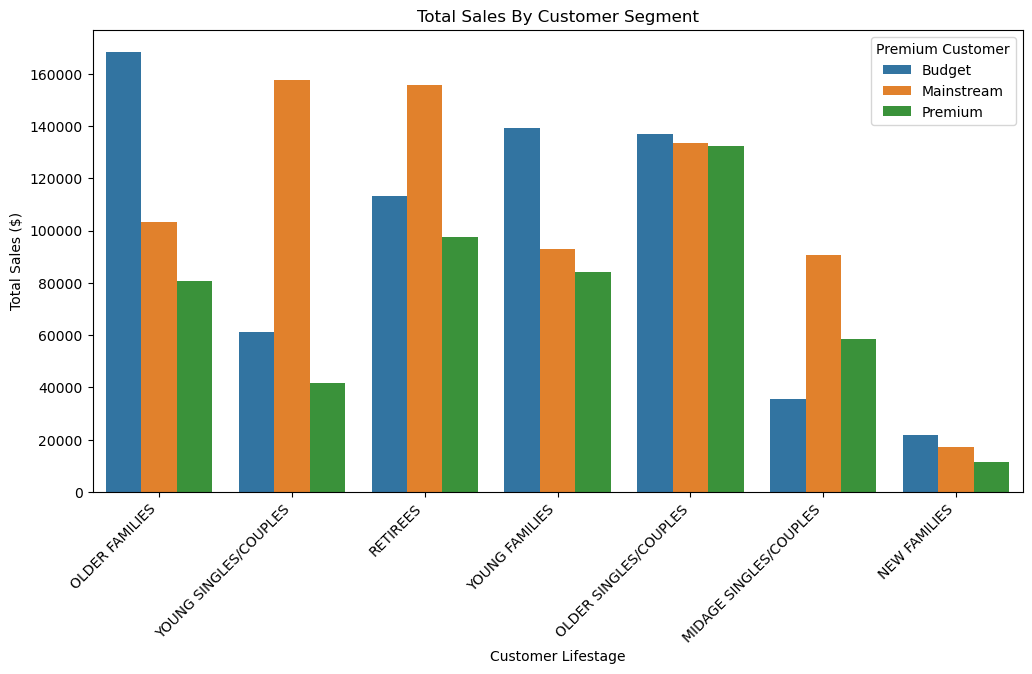

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# AGGREGATE TOTAL SALES BY CUSTOMER SEGMENT (LIFESTAGE AND PREMIUM_CUSTOMER)
sales_by_segment = merged_df.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().reset_index()

# SORT BY TOTAL SALES FOR BETTER VISUALIZATION 
sales_by_segment = sales_by_segment.sort_values(by="TOT_SALES", ascending=False)

#PLOT SALES DISTRIBUTION BY CUSTOMER SEGMENT 
plt.figure(figsize=(12,6))
sns.barplot(data=sales_by_segment,x="LIFESTAGE",y="TOT_SALES",hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45,ha='right')
plt.xlabel("Customer Lifestage")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales By Customer Segment")
plt.legend(title="Premium Customer")
plt.show()

### Preliminary Analysis  of Customer Segments 
1. Top Sales Segments:
* **Older Families(Budget)** contribute the highest sales.
* **Young Singles/Couples(Mainstream)** and  **Retirees(Mainstream)** follow closely.
* **New Families(Premium,Budget,Mainstream)** contributes the  least
  
2. Visual findings:
* The bar chart shows the total sales distribution by customer segment.
* Budget-conscious **Older Families and Young Families** are among the highest spenders.

### Top Selling Chips  Products

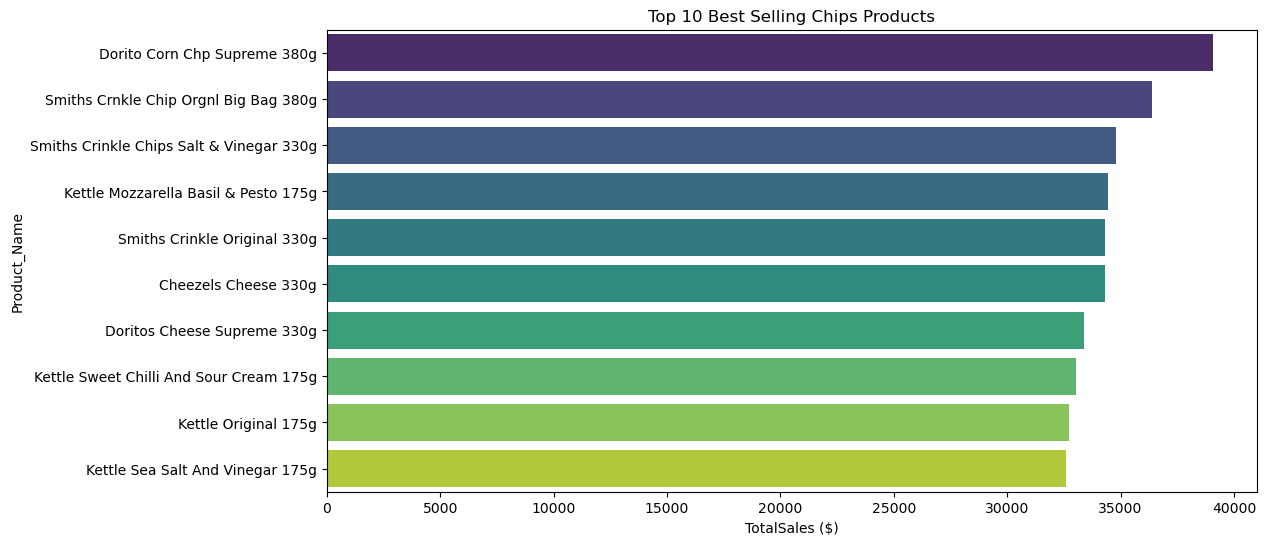

,PROD_NAME,TOT_SALES
11,Dorito Corn Chp Supreme 380g,39052.0
86,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
76,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2
33,Kettle Mozzarella Basil & Pesto 175g,34457.4
85,Smiths Crinkle Original 330g,34302.6
6,Cheezels Cheese 330g,34296.9
12,Doritos Cheese Supreme 330g,33390.6
39,Kettle Sweet Chilli And Sour Cream 175g,33031.8
34,Kettle Original 175g,32740.2
35,Kettle Sea Salt And Vinegar 175g,32589.0


In [16]:
top_products = merged_df.groupby("PROD_NAME")["TOT_SALES"].sum().reset_index()

# SORT BY TOTAL SALES AND GET THE TOP 10 PRODUCTS 
top_products = top_products.sort_values(by="TOT_SALES",ascending=False).head(10)

#PLOT THE TOP SELLING PRODUCTS 
plt.figure(figsize=(12,6))
sns.barplot(data=top_products,x="TOT_SALES",y="PROD_NAME", palette="viridis", hue="PROD_NAME",legend=False)
plt.xlabel("TotalSales ($)")
plt.ylabel("Product_Name")
plt.title("Top 10 Best Selling Chips Products")
plt.show()
top_products

### Key Observation 
* **Doritos and Smiths dominates sales**, particularly  their larger 330g-380g packs.
* **Kettle Brand appears multiple times**, indicating strong customer preference.
* **Larger pack sizes (330g+)** seem to drive more revenue.

### Customers Purchase Frequency Analysis

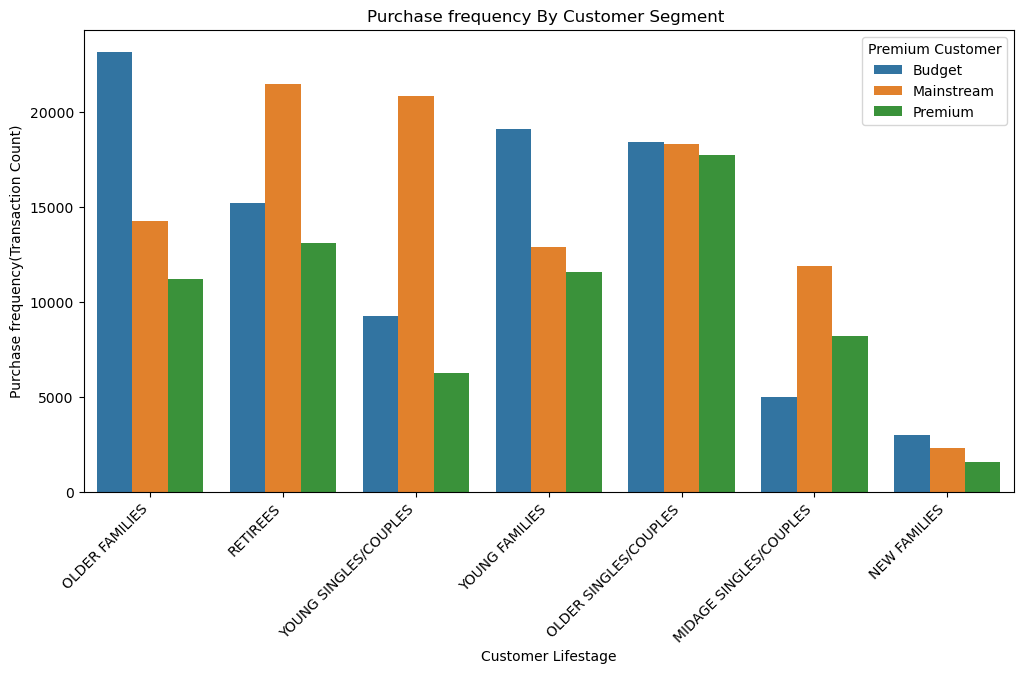

,LIFESTAGE,PREMIUM_CUSTOMER,PURCHASE_COUNT
6,OLDER FAMILIES,Budget,23160
13,RETIREES,Mainstream,21466
19,YOUNG SINGLES/COUPLES,Mainstream,20854
15,YOUNG FAMILIES,Budget,19122
9,OLDER SINGLES/COUPLES,Budget,18407
10,OLDER SINGLES/COUPLES,Mainstream,18318
11,OLDER SINGLES/COUPLES,Premium,17754
12,RETIREES,Budget,15201
7,OLDER FAMILIES,Mainstream,14244
14,RETIREES,Premium,13096


In [17]:
purchase_frequency = merged_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])["TXN_ID"].count().reset_index()

# RENAME COLUMN FOR CLARITY 
purchase_frequency.rename(columns={"TXN_ID":"PURCHASE_COUNT"},inplace=True)

# SORT FOR BETTER VISUALIZATION 
purchase_frequency = purchase_frequency.sort_values(by="PURCHASE_COUNT",ascending=False)

# PLOT PURCHASE FREQUENCY 
plt.figure(figsize=(12,6))
sns.barplot(data=purchase_frequency,x="LIFESTAGE",y="PURCHASE_COUNT",hue="PREMIUM_CUSTOMER")
plt.xticks(rotation=45,ha='right')
plt.xlabel("Customer Lifestage")
plt.ylabel("Purchase frequency(Transaction Count)")
plt.title("Purchase frequency By Customer Segment ")
plt.legend(title="Premium Customer")
plt.show()

# DISPLAY THE PURCHASE FREQUENCY TABLE 
purchase_frequency

### Key Insights: 
* **Older Families(Budget) are the most frequent buyers**, aligning with their top total sales.
* **Young Singles/Couples(Mainstream)** buy often but have lower total spend than Older Families.
* **New Families Purchases the least**, indicating they are not a key segment for chips.

### Parket size Prefrence Analysis 

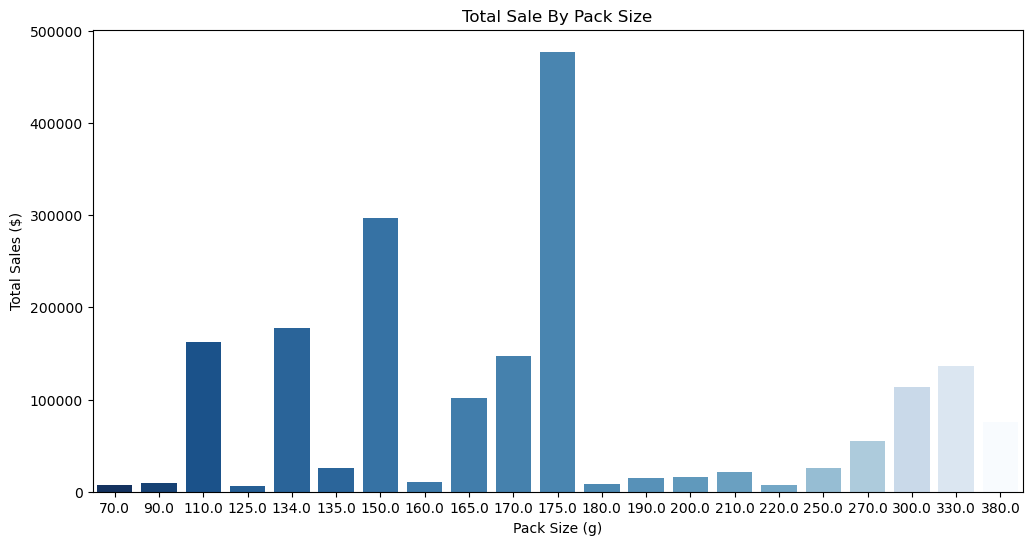

,PACK_SIZE,TOT_SALES
0,70.0,6852.0
1,90.0,9676.4
2,110.0,162765.4
3,125.0,5733.0
4,134.0,177655.5
5,135.0,26090.4
6,150.0,296609.7
7,160.0,10647.6
8,165.0,101360.6
9,170.0,146673.0


In [18]:
merged_df["PACK_SIZE"]= merged_df["PROD_NAME"].str.extract(r'(\d{2,3})g').astype(float)

# AGGREGATE TOTAL SALES BY PACK SIZE 
pack_size_sales = merged_df.groupby("PACK_SIZE")["TOT_SALES"].sum().reset_index()

#SORT BY PACK SIZE
pack_size_sales = pack_size_sales.sort_values(by="PACK_SIZE")

#PLOT SALES BY PACK SIZE
plt.figure(figsize=(12,6))
sns.barplot(data=pack_size_sales,x="PACK_SIZE",y="TOT_SALES",palette="Blues_r",hue="PACK_SIZE",legend=False)
plt.xlabel("Pack Size (g)")
plt.ylabel("Total Sales ($)")
plt.title("Total Sale By Pack Size")
plt.show()

#DISPLAY PACK SIZE SALE DATA
pack_size_sales

The **most popular pack sizes by total sales** are:
1. **175g - $477,112**
2. **150g - $296,610**
3. **134g - $177,656**
4. **170g - $146,673**
5. **330g - $136,794**

### Key insights: 
* **Mid-sized packs (150g-175g) are the most popular,** making up a significant portion of sales.
* **Large packs (330g,380g) also perform well,** possibly due to family or bulk buyers.
* **Small packs (70g-110g) contribute the least,** suggesting they are not the primary choice for most customers.

### Pack Size Preference By Customer Segment

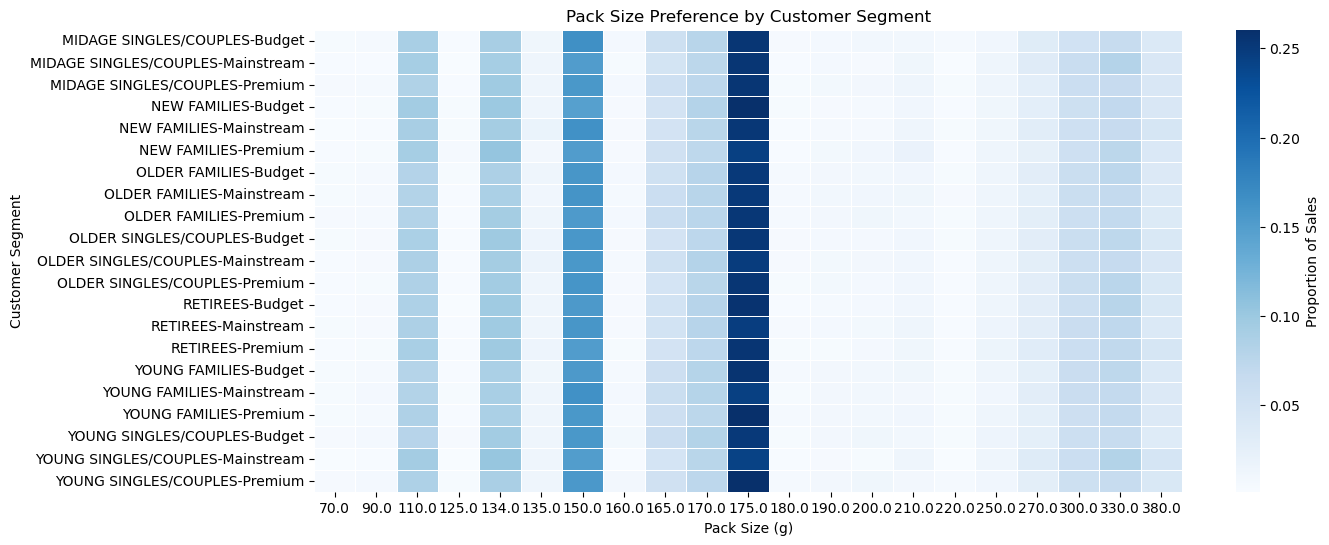

PACK_SIZE                                   70.0      90.0      110.0  \
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget            0.003506  0.006380  0.090133   
                       Mainstream        0.002586  0.002518  0.092328   
                       Premium           0.004900  0.006141  0.084152   
NEW FAMILIES           Budget            0.002784  0.004022  0.095377   
                       Mainstream        0.002150  0.002640  0.091470   
                       Premium           0.002769  0.004074  0.092409   
OLDER FAMILIES         Budget            0.004018  0.006084  0.081048   
                       Mainstream        0.004202  0.005583  0.082356   
                       Premium           0.004764  0.006104  0.081391   
OLDER SINGLES/COUPLES  Budget            0.004005  0.004559  0.087900   
                       Mainstream        0.003413  0.005316  0.087071   
                       Premium           0.003073  0.004484  0.084560   
RETIREES               Budget            0.002551  0.004532  0.085530   
                       Mainstream        0.003910  0.005072  0.086649   
                       Premium           0.003355  0.004434  0.090194   
YOUNG FAMILIES         Budget            0.004215  0.006196  0.080036   
                       Mainstream        0.004093  0.007258  0.082326   
                       Premium           0.003933  0.005944  0.084926   
YOUNG SINGLES/COUPLES  Budget            0.004902  0.006604  0.079085   
                       Mainstream        0.001702  0.002521  0.094342   
                       Premium           0.005241  0.006799  0.086248   

PACK_SIZE                                   125.0     134.0     135.0  \
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget            0.003008  0.090517  0.011671   
                       Mainstream        0.001603  0.091767  0.014517   
                       Premium           0.003225  0.096659  0.013633   
NEW FAMILIES           Budget            0.003507  0.100592  0.014030   
                       Mainstream        0.003512  0.093041  0.018062   
                       Premium           0.006337  0.104098  0.009319   
OLDER FAMILIES         Budget            0.003809  0.086748  0.013427   
                       Mainstream        0.003157  0.088423  0.010926   
                       Premium           0.003346  0.092863  0.013117   
OLDER SINGLES/COUPLES  Budget            0.002910  0.097825  0.014768   
                       Mainstream        0.003259  0.092785  0.017308   
                       Premium           0.002883  0.095148  0.013153   
RETIREES               Budget            0.002213  0.096609  0.013353   
                       Mainstream        0.003092  0.096716  0.013713   
                       Premium           0.002892  0.097972  0.014679   
YOUNG FAMILIES         Budget            0.003058  0.088301  0.012602   
                       Mainstream        0.003674  0.090093  0.012801   
                       Premium           0.003314  0.087946  0.014174   
YOUNG SINGLES/COUPLES  Budget            0.004536  0.094598  0.012658   
                       Mainstream        0.001476  0.103217  0.014490   
                       Premium           0.004225  0.089334  0.013500   

PACK_SIZE                                   150.0     160.0     165.0  \
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget            0.164410  0.007348  0.056353   
                       Mainstream        0.152088  0.004094  0.048264   
                       Premium           0.156245  0.007062  0.055532   
NEW FAMILIES           Budget            0.147232  0.004936  0.049215   
                       Mainstream        0.164322  0.004539  0.049169   
                       Premium           0.151669  0.004553  0.053873   
OLDER FAMILIES         Budget            0.158287  0.006

In [19]:
pack_size_segment = merged_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER","PACK_SIZE"])["TOT_SALES"].sum().reset_index()

# PIVOT TABLE FOR VISUALIZATION
pack_size_pivot= pack_size_segment.pivot_table(values="TOT_SALES",index=["LIFESTAGE","PREMIUM_CUSTOMER"],columns="PACK_SIZE",aggfunc="sum")

# NORMALIZE SALES WITHIN EACH SEGMENT TO SEE RELATIVE PREFERENCES 
pack_size_pivot_normalized= pack_size_pivot.div(pack_size_pivot.sum(axis=1),axis=0)

# PLOT HEATMAP OF PACK SIZE PREFERENCES BY SEGMENT 
plt.figure(figsize=(14,6))
sns.heatmap(pack_size_pivot_normalized,cmap="Blues",linewidths=0.5,cbar_kws={'label':'Proportion of Sales'})
plt.xlabel("Pack Size (g)")
plt.ylabel("Customer Segment")
plt.title("Pack Size Preference by Customer Segment")
plt.show()

# DISPLAY NORMALIZED PACK SIZE PREFERENCE BY DATA
pack_size_pivot_normalized

### Key Observations: 
* 175 is the most popular pack size across all customer segments.
* Older Families,Retires, and  Mainstream Young Singles prefer larger packs (330g, 380g).
* Budget and premium customers lean towards mid-sized packs (150g-175g), while Mainstream customers are most likely to purchase larger packs.
* Small packs (70g-110g) have minimal sales,suggesting they are not a key product for any segment.

### Brand Preference By Customer Segment 

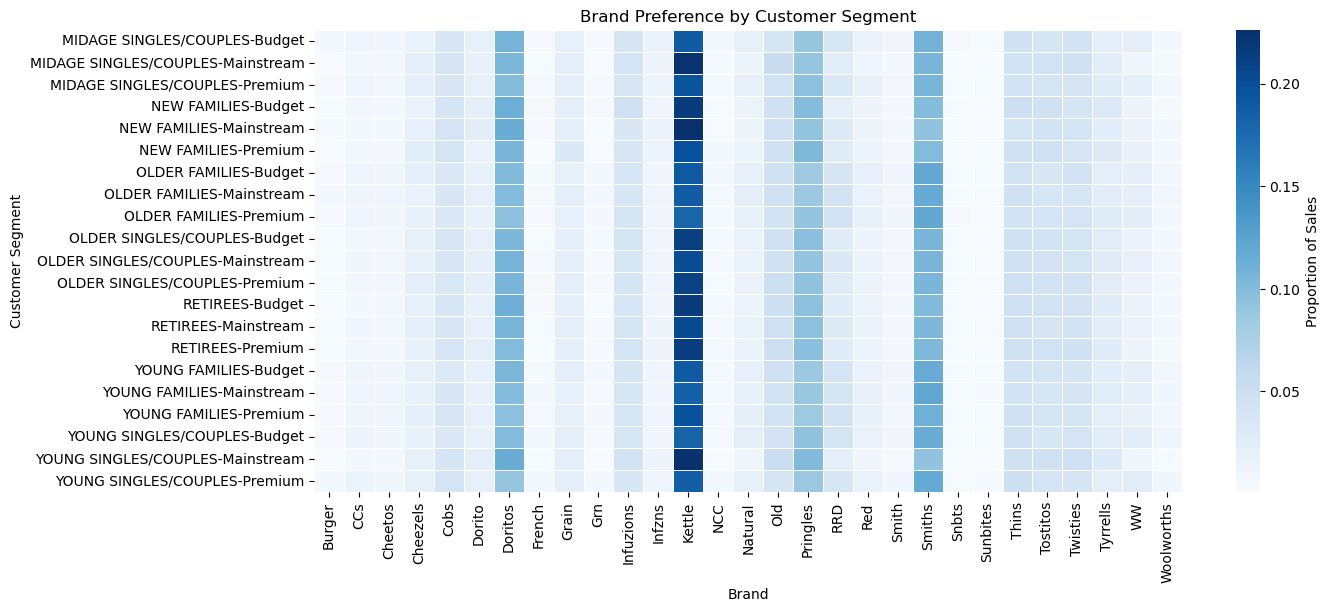

BRAND                                      Burger       CCs   Cheetos  \
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget            0.005440  0.012122  0.009506   
                       Mainstream        0.002330  0.007077  0.007329   
                       Premium           0.004369  0.011033  0.008499   
NEW FAMILIES           Budget            0.003147  0.007470  0.006061   
                       Mainstream        0.003650  0.005925  0.005766   
                       Premium           0.002602  0.007676  0.008206   
OLDER FAMILIES         Budget            0.004112  0.011001  0.010022   
                       Mainstream        0.005381  0.010698  0.011240   
                       Premium           0.003935  0.010805  0.010366   
OLDER SINGLES/COUPLES  Budget            0.003515  0.007462  0.008139   
                       Mainstream        0.002983  0.010060  0.008521   
                       Premium           0.002974  0.007732  0.008624   
RETIREES               Budget            0.002622  0.006886  0.007753   
                       Mainstream        0.003369  0.008997  0.008593   
                       Premium           0.003180  0.007721  0.005843   
YOUNG FAMILIES         Budget            0.003978  0.011574  0.009303   
                       Mainstream        0.004263  0.011474  0.011580   
                       Premium           0.004407  0.011522  0.010596   
YOUNG SINGLES/COUPLES  Budget            0.003950  0.013052  0.010253   
                       Mainstream        0.001547  0.005396  0.005702   
                       Premium           0.005634  0.013566  0.009853   

BRAND                                    Cheezels      Cobs    Dorito  \
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget            0.017241  0.036914  0.020682   
                       Mainstream        0.023731  0.039798  0.018719   
                       Premium           0.022477  0.035443  0.020746   
NEW FAMILIES           Budget            0.016444  0.040030  0.022083   
                       Mainstream        0.020207  0.041096  0.024833   
                       Premium           0.025559  0.041998  0.015838   
OLDER FAMILIES         Budget            0.022113  0.033607  0.018551   
                       Mainstream        0.017467  0.036036  0.019510   
                       Premium           0.018262  0.032743  0.019099   
OLDER SINGLES/COUPLES  Budget            0.020568  0.037147  0.019723   
                       Mainstream        0.018280  0.038372  0.021586   
                       Premium           0.023124  0.034879  0.021796   
RETIREES               Budget            0.021113  0.038387  0.019360   
                       Mainstream        0.021159  0.036321  0.019520   
                       Premium           0.019242  0.037787  0.023531   
YOUNG FAMILIES         Budget            0.021120  0.032315  0.019195   
                       Mainstream        0.020983  0.036694  0.017758   
                       Premium           0.022243  0.038486  0.019881   
YOUNG SINGLES/COUPLES  Budget            0.018694  0.032816  0.019030   
                       Mainstream        0.021052  0.038983  0.023217   
                       Premium           0.020561  0.040699  0.019980   

BRAND                                     Doritos    French     Grain  \
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget            0.107535  0.004308  0.020172   
                       Mainstream        0.103717  0.002676  0.023312   
                       Premium           0.099980  0.004415  0.023720   
NEW FAMILIES           Budget            0.111754  0.003694  0.021342   
                       Mainstream        0.114565  0.004232  0.024333   
                       Premium           0.104864  0.001305  0.032582   
OLDER FAMILIES         Budget            0.101220  0.004

In [20]:
merged_df["BRAND"]= merged_df["PROD_NAME"].str.split().str[0]

# AGGREGATE SALES BY BRAND AND CUSTOMER SEGMENT 
brand_segment_sales= merged_df.groupby(["LIFESTAGE","PREMIUM_CUSTOMER","BRAND"])["TOT_SALES"].sum().reset_index()

# PIVOT TABLE FOR VISUALIZATION
brand_pivot= brand_segment_sales.pivot_table(values="TOT_SALES",index=["LIFESTAGE","PREMIUM_CUSTOMER"],columns="BRAND",aggfunc="sum")

# NORMALIZE SALES WITHIN EACH SEGMENT FOR COMPARISON 
brand_pivot_normalized = brand_pivot.div(brand_pivot.sum(axis=1),axis=0)

# PLOT HEATMAP OF BRAND PREFERENCE BY CUSTOMER SEGMENT 
plt.figure(figsize=(14,6))
sns.heatmap(brand_pivot_normalized,cmap="Blues",linewidths=0.5,cbar_kws={'label':'Proportion of Sales'})
plt.xlabel("Brand")
plt.ylabel("Customer Segment")
plt.title("Brand Preference by Customer Segment")
plt.xticks(rotation=90)
plt.show()

# DISPLAY NORMALIZED BRAND PREFERENCE DATA
brand_pivot_normalized


### Key Takeways: 
* Doritos, Smiths, and kettle are the most popular brands across all segments.
* Doritos is especially strong among Young Singles/Couples and Budget shoppers.
* Smiths is dominant among Young Older Families and Retirees.
* Premium customers prefer Tyrrells and kettle, which are positioned as premium  brands.
* Budget-conscious consumers buy more Woolworths and home-brand chips.
* Twisties and CC's have a solid presence in all groups but are more common Young Families. 

## Final Recommendations for the Next 6 Months 
1. Target Young Singles/Couples with Doritos promotions (e.g, digital ads,in-store discounts).
2. **Strengthen Smiths marketing for Older Families and Retirees(e.g, bundle deals, family-size packs)**.
3. **Expand premium-brand advertising (kettke, Tyrrells)** for high-income customers.
4. **Offer bulk deals on larger pack sizes (330g+)** to attract Older Families and Retirees.
5. **Reduce focus on small pack sizes (under 110g),** as they have low demand.